In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

Load datasets from Google drives

In [2]:
train_url = 'https://drive.google.com/file/d/1NTnEDxlG9KBnr9rUXp5MdXSvrMpWY4fW/view?usp=sharing'
train_url = 'https://drive.google.com/uc?id=' + train_url.split('/')[-2]

train_df = pd.read_csv(train_url)

print(train_url)

https://drive.google.com/uc?id=1NTnEDxlG9KBnr9rUXp5MdXSvrMpWY4fW


In [3]:
transactions_df = pd.read_csv('transactions.csv')

# print(transactions_df)

In [4]:
# logs = pd.read_csv('/content/drive/MyDrive/DATA MINING /user_logs.csv',nrows=700000)

user_logs_df = pd.read_csv('user_logs.csv',nrows=700000)

print(user_logs_df)

                                                msno      date  num_25  \
0       u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=  20170331       8   
1       nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=  20170330       2   
2       2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=  20170331      52   
3       ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=  20170331     176   
4       EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=  20170331       2   
...                                              ...       ...     ...   
699995  uvhMEjYPNvi7wTUglEulqS1u/FzzM8JIMJIsdEKOgCo=  20170317      12   
699996  vIBAdZ1fS9n2DHcUwx09uBQ6Z4AIjm4PkWSEhVbV8lE=  20170311      25   
699997  BfNRJVdqzIMeqLGU1BMD8/vFi5WuQFywlOLHEJIQCiY=  20170317       4   
699998  7vQQzswllhkzzA4V5AFTMgHXJQK5TsmpH/KobLCcm6s=  20170317      19   
699999  M/oMmqy75iuuYIKSun3wRLGtoJKXQh0JhDElCVuOsfg=  20170311       1   

        num_50  num_75  num_985  num_100  num_unq  total_secs  
0            4       0        1       21       

In [7]:
members_df = pd.read_csv('members_v3.csv')

print(members_df)

                                                 msno  city  bd  gender  \
0        Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=     1   0     NaN   
1        +tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=     1   0     NaN   
2        cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=     1   0     NaN   
3        9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=     1   0     NaN   
4        WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=     6  32  female   
...                                               ...   ...  ..     ...   
6769468  VSGkb3hyBRUtb/b1MQUZbvOkktS3vKLnhMHW0CF8eyU=     1   0     NaN   
6769469  nWjH7glPkZ7jOVaCRwwjlpmp0T1hSWdv8hMJxiWCwKc=     1   0     NaN   
6769470  GH+b5+1tlv7ZZXsA8upBzVXMTLyffKcsF7WoU8b5rOI=    15  26  female   
6769471  XVlwT3fdCFGKqerEKBzUIjK+jzI6jzSke4cDMVhYyjE=     1   0     NaN   
6769472  isBt+JlgvZRNy6lxVr5vvuJ4lD00ofTaKyJ+uRnGcPg=     1   0     NaN   

         registered_via  registration_init_time  
0                    11                20110911  

Merge four datasets into a large dataset

In [8]:
# count the average playtime per day for every member

avg_playtime = user_logs_df.groupby('msno', as_index=False)['total_secs'].mean()
avg_playtime = avg_playtime.rename(columns={"total_secs": "playtime_per_day"})
print(avg_playtime.min())

msno                +++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=
playtime_per_day                                           0.026
dtype: object


In [9]:
# get the information about the latest transaction

latest_transaction_date = transactions_df.groupby('msno', as_index=False)['transaction_date'].max()
latest_transactions = transactions_df.merge(latest_transaction_date, on=["msno", "transaction_date"])
# print(latest_transactions)

In [11]:
# merge all dataset

merged_data = train_df.merge(avg_playtime, how='inner', on=["msno"]).merge(members_df, how='inner', on="msno").merge(latest_transactions, how='inner', on=["msno"])

print(merged_data)

                                                msno  is_churn  \
0       K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=         1   
1       moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=         1   
2       dW/tPZMDh2Oz/ksduEctJbsz0MXw3kay/1AlZCq3EbI=         1   
3       otEcMhAX3mU4gumUSogqgteN3oaNmhdmTkoof2iRYEE=         1   
4       t5rqTxCnG7s5VBgEfdkQCezv5KBK7+DMujNibYgylrs=         1   
...                                              ...       ...   
346049  i21C/gnxqgu1EIO6eBzGDhqcvuzEfV1u78eYJjLPh5I=         0   
346050  5dXGSlRH5LQVFbTUGQwfyyaFb8w/FVqfTS8N4aNEots=         0   
346051  SjVZDYaiKgEHpFX1PcFDS94b9CFdaHjg78rfumtm/F4=         0   
346052  /QlhSIWEZelYnwttYJSQL50EJJ2yRV+ThQIVQLvctp8=         0   
346053  iZE41tbAQ65rJq60olkJT4BJzuUAYgQdfbEemXe/TTk=         0   

        playtime_per_day  city  bd  gender  registered_via  \
0             14106.6695    13  35  female               7   
1             11303.9945     9  28  female               3   
2             23121.0

In [12]:
# check missing values

merged_data.isna().sum(axis = 0)

msno                           0
is_churn                       0
playtime_per_day               0
city                           0
bd                             0
gender                    170754
registered_via                 0
registration_init_time         0
payment_method_id              0
payment_plan_days              0
plan_list_price                0
actual_amount_paid             0
is_auto_renew                  0
transaction_date               0
membership_expire_date         0
is_cancel                      0
dtype: int64

In [13]:
# Replace missing values in column 'gender' with integer -1

merged_data[['gender']] = merged_data[['gender']].fillna('-1')

In [14]:
# Convert registration_init_time, transaction_date, membership_expire_date to years

merged_data['registration_init_time'] = merged_data['registration_init_time'].astype(str).str[:4]
merged_data['transaction_date'] = merged_data['transaction_date'].astype(str).str[:4]
merged_data['membership_expire_date'] = merged_data['membership_expire_date'].astype(str).str[:4]

print(merged_data)

                                                msno  is_churn  \
0       K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=         1   
1       moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=         1   
2       dW/tPZMDh2Oz/ksduEctJbsz0MXw3kay/1AlZCq3EbI=         1   
3       otEcMhAX3mU4gumUSogqgteN3oaNmhdmTkoof2iRYEE=         1   
4       t5rqTxCnG7s5VBgEfdkQCezv5KBK7+DMujNibYgylrs=         1   
...                                              ...       ...   
346049  i21C/gnxqgu1EIO6eBzGDhqcvuzEfV1u78eYJjLPh5I=         0   
346050  5dXGSlRH5LQVFbTUGQwfyyaFb8w/FVqfTS8N4aNEots=         0   
346051  SjVZDYaiKgEHpFX1PcFDS94b9CFdaHjg78rfumtm/F4=         0   
346052  /QlhSIWEZelYnwttYJSQL50EJJ2yRV+ThQIVQLvctp8=         0   
346053  iZE41tbAQ65rJq60olkJT4BJzuUAYgQdfbEemXe/TTk=         0   

        playtime_per_day  city  bd  gender  registered_via  \
0             14106.6695    13  35  female               7   
1             11303.9945     9  28  female               3   
2             23121.0

In [15]:
# replacing values in column gender
merged_data['gender'].replace(['female', 'male'],
                        [0, 1], inplace=True)

In [16]:
# convert all columns datatype to numeric

merged_data['gender'] = merged_data['gender'].astype(int)
merged_data['registration_init_time'] = merged_data['registration_init_time'].astype(int)
merged_data['transaction_date'] = merged_data['transaction_date'].astype(int)
merged_data['membership_expire_date'] = merged_data['membership_expire_date'].astype(int)

In [17]:
merged_data.dtypes

msno                       object
is_churn                    int64
playtime_per_day          float64
city                        int64
bd                          int64
gender                      int64
registered_via              int64
registration_init_time      int64
payment_method_id           int64
payment_plan_days           int64
plan_list_price             int64
actual_amount_paid          int64
is_auto_renew               int64
transaction_date            int64
membership_expire_date      int64
is_cancel                   int64
dtype: object

In [18]:
# set row names (index) to the msno column

merged_data = merged_data.set_index('msno')

print(merged_data)

                                              is_churn  playtime_per_day  \
msno                                                                       
K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=         1        14106.6695   
moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=         1        11303.9945   
dW/tPZMDh2Oz/ksduEctJbsz0MXw3kay/1AlZCq3EbI=         1        23121.0130   
otEcMhAX3mU4gumUSogqgteN3oaNmhdmTkoof2iRYEE=         1         3098.3520   
t5rqTxCnG7s5VBgEfdkQCezv5KBK7+DMujNibYgylrs=         1         1794.9300   
...                                                ...               ...   
i21C/gnxqgu1EIO6eBzGDhqcvuzEfV1u78eYJjLPh5I=         0         2580.4430   
5dXGSlRH5LQVFbTUGQwfyyaFb8w/FVqfTS8N4aNEots=         0        10595.9480   
SjVZDYaiKgEHpFX1PcFDS94b9CFdaHjg78rfumtm/F4=         0         6164.1825   
/QlhSIWEZelYnwttYJSQL50EJJ2yRV+ThQIVQLvctp8=         0        12926.0640   
iZE41tbAQ65rJq60olkJT4BJzuUAYgQdfbEemXe/TTk=         0         4931.6120   

           

In [19]:
merged_data.to_csv('merged_raw_datasets.csv', encoding='utf-8')

This file merged the four raw datasets into a large dataset. For transactions.csv, just used the transaction information of the msno's latest transaction. For user_logs.csv, just used the average playtime_per_day for every msno. For the gender column, all Null values are converted to -1, female to 0, and male to 1. registration_init_time, transaction_date, and membership_expire_date only used the year record. All columns are converted to numeric datatypes for easily used in classification models.

churn: 24092
renewal: 321962


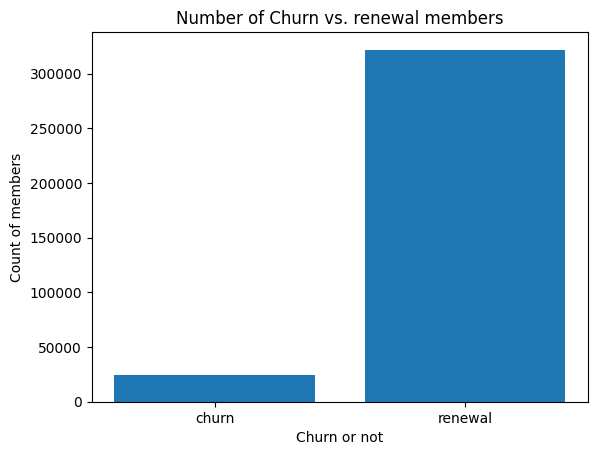

In [22]:
# bar plot for number of churn

count_churn = len(merged_data[(merged_data['is_churn'] == 1)])
count_renewal = len(merged_data[(merged_data['is_churn'] == 0)])

x = ['churn', 'renewal']
y = [count_churn, count_renewal]

print(f'{x[0]}: {y[0]}')
print(f'{x[1]}: {y[1]}')

plt.bar(x, y)

plt.xlabel("Churn or not")
plt.ylabel("Count of members")
plt.title("Number of Churn vs. renewal members")
plt.show()